<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/5_5_correlation_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1
Для работы используйте датасет “[happines_corruption.csv](https://drive.google.com/open?id=1O2l2q2wP7RHD_2MDsR9K-WgalezHRTPx&usp=drive_fs)”, приложенный к материалам занятия. Описание столбцов:

*   Country - Name of the country.
*   happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10
*   gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score.
*   family - The extent to which Family contributes to the calculation of the Happiness Score
*   health - The extent to which Life expectancy contributed to the calculation of the Happiness Score
*   freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
*   generosity - A numerical value calculated based on poll participants’ perceptions of generosity in their country.
*   government_trust - The extent to which Perception of Corruption contributes to Happiness Score.
*   dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country.
*   continent - Region of the country.

Задание 1

    Базово изучите датасет (достаточно методов info() и describe()).
    Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
    Желательно, но не обязательно:
    Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.



In [ ]:
# Загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
happiness = pd.read_csv('/content/happines_corruption.csv')
happiness.head() # Просмотрим заголовки

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [ ]:
happiness.info() # Просмотрим информацию, все столбцы заполнены полностью

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [ ]:
happiness.describe() # Выведем описательные статистики для таблицы

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


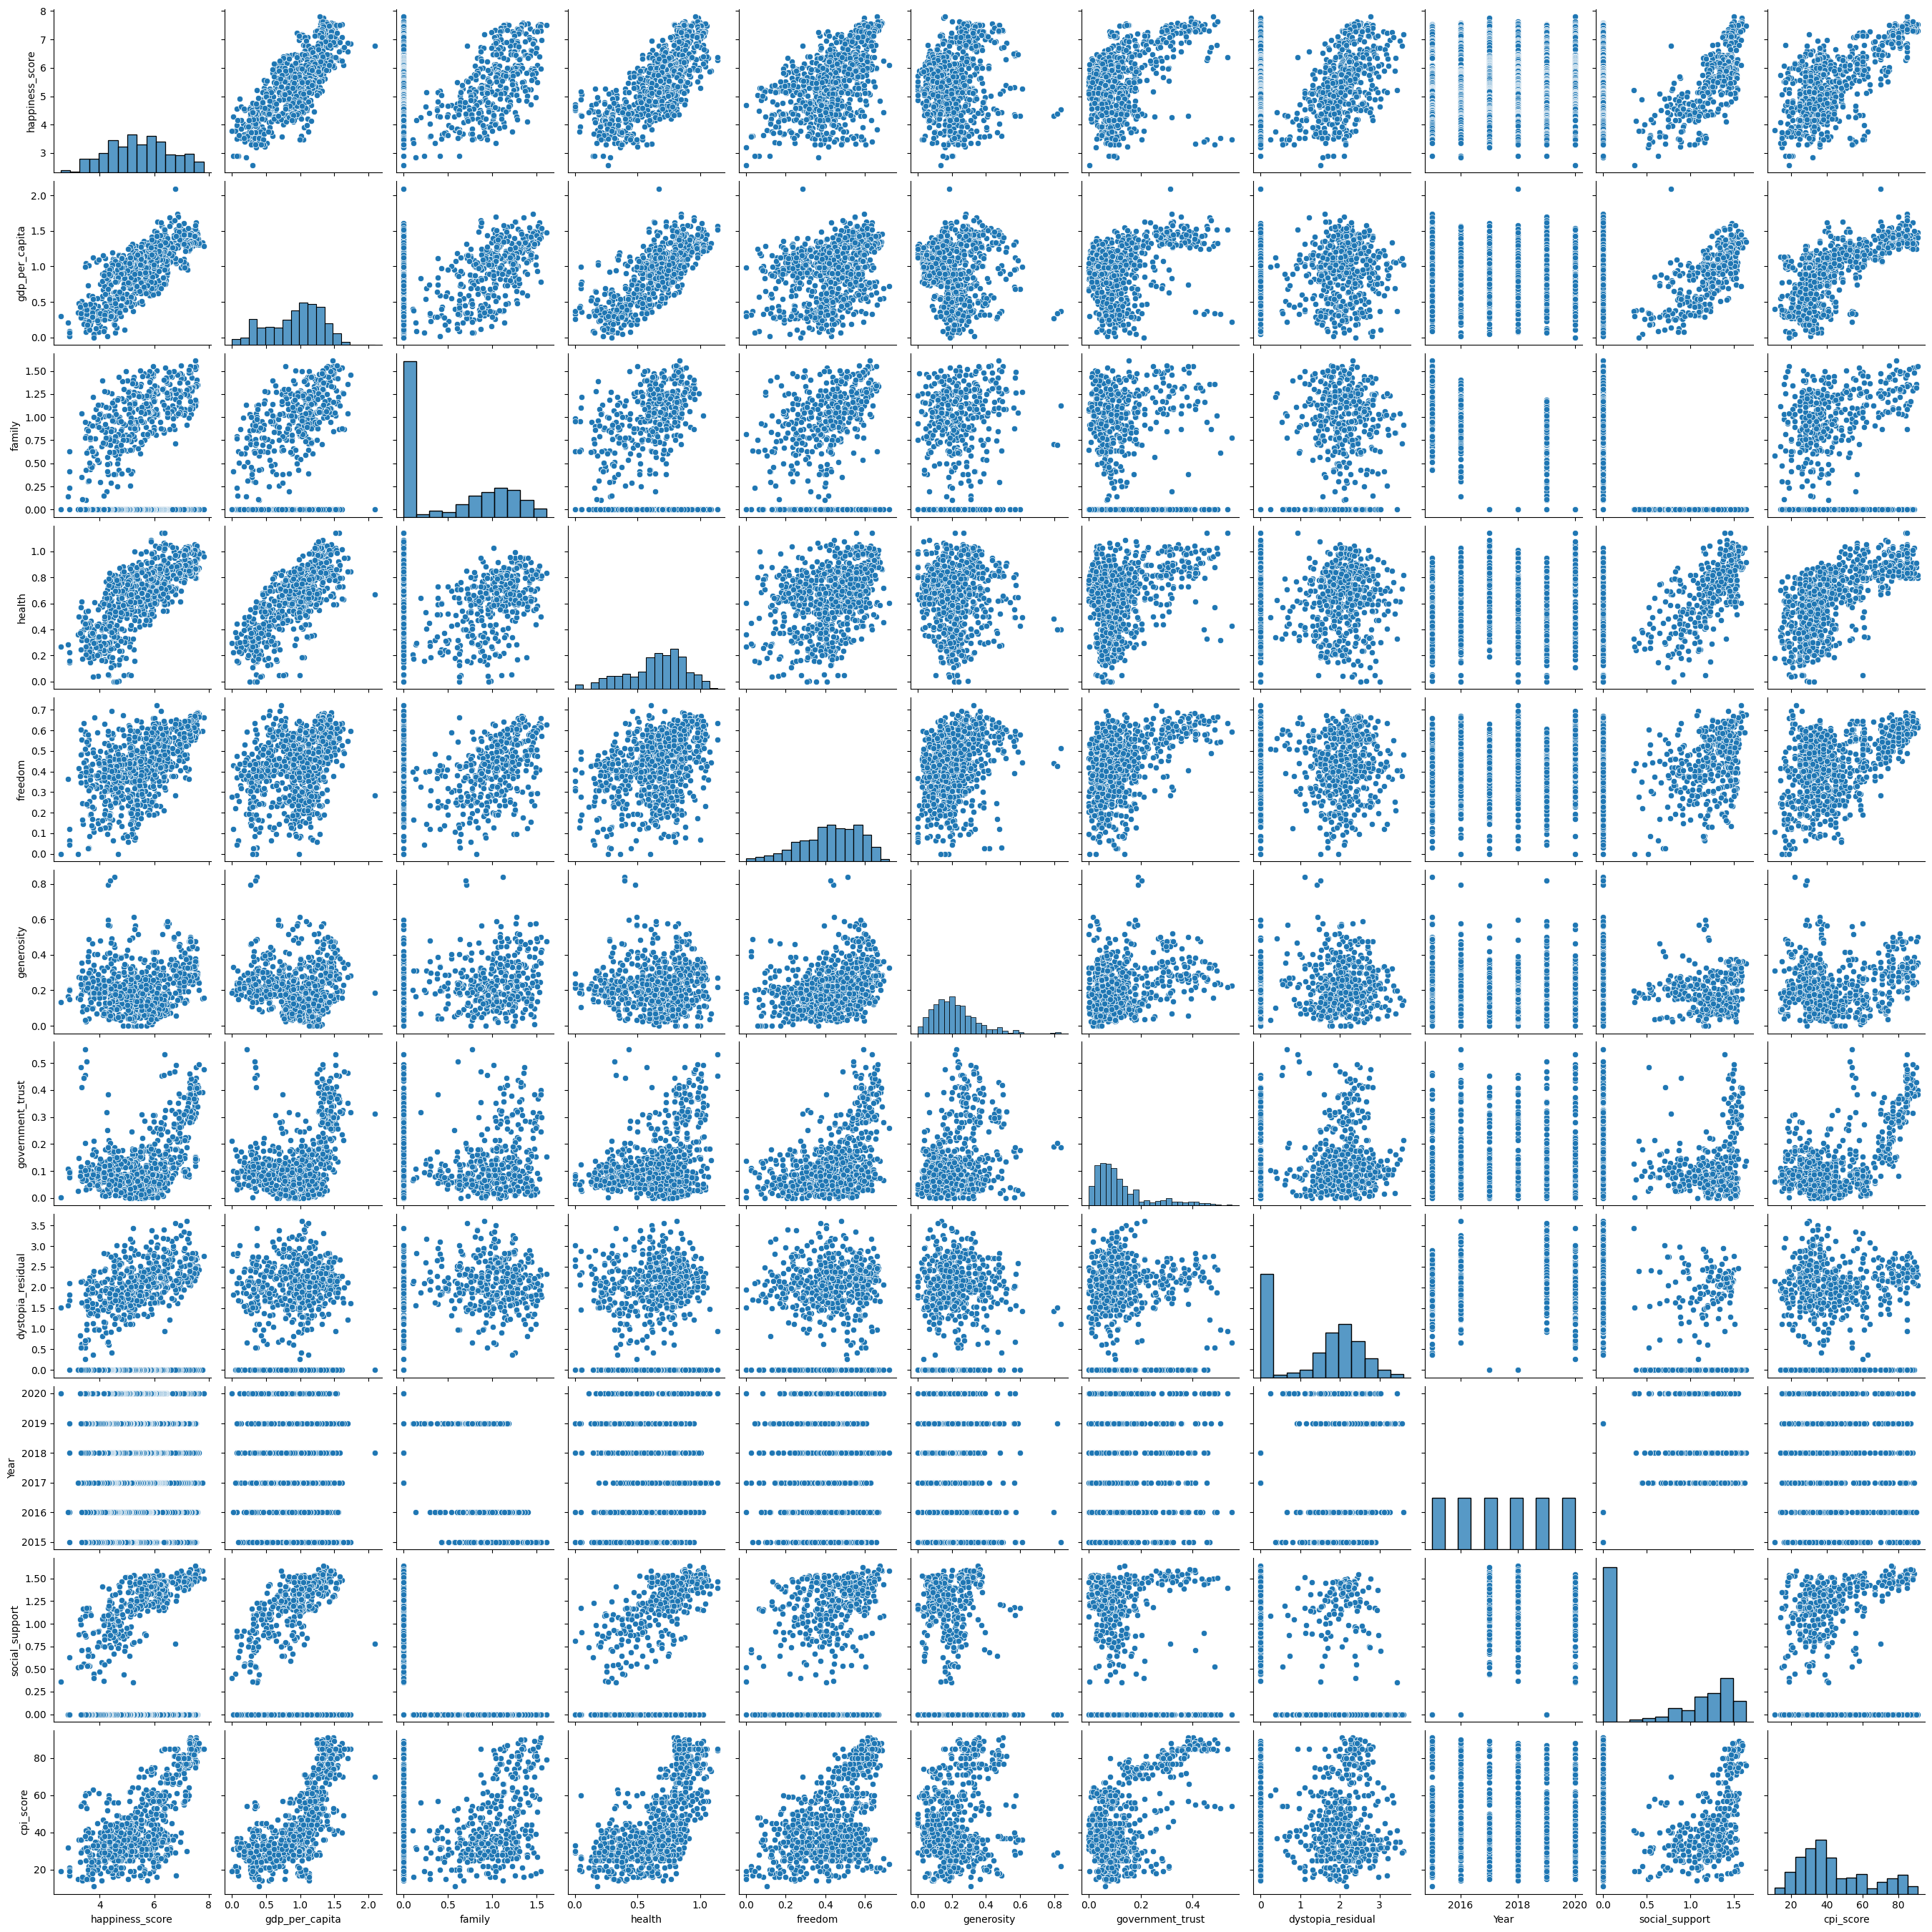

In [ ]:
sns.pairplot(happiness) # для подбора гипотез к заданию просмотрим визуально взаимосвязь между признаками нашей таблицы

Выберем первую нулевую гипотезу
H0 = уровень счастья зависит от здоровья

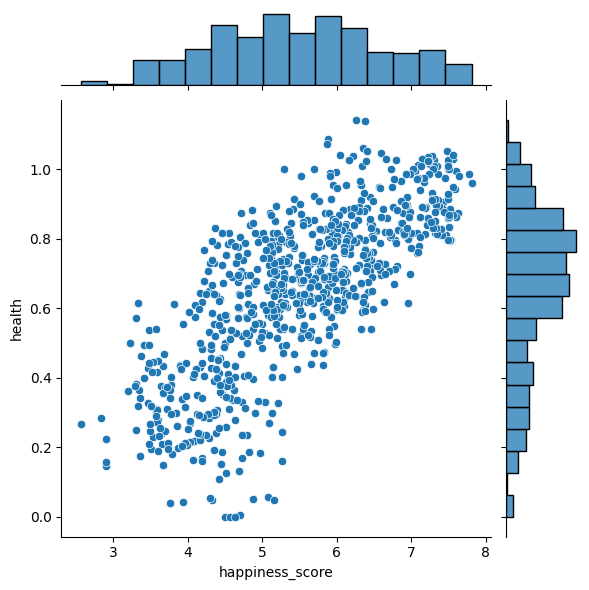

In [ ]:
sns.jointplot(x='happiness_score', y ='health', data=happiness)

In [ ]:
# считаем коэф. корреляции Пирсона
happiness[['happiness_score', 'health']].corr()

,happiness_score,health
happiness_score,1.000000,0.753534
health,0.753534,1.000000


**Выводы:**

При анализе графика взаимосвязи уровня счастья от здоровья мы видим линейную связь. Коэффициент корреляции Пирсона равен примерно 0,754, что говорит о том, что существует умеренная положительная корреляция между показателями счастья  и здоровья. Это означает, что чем выше показатель счастья, тем выше, скорее всего, будет показатель здоровья, и наоборот.
Следовательно нулевую гипотезу мы не отвергаем.


Для второй гипотезы проверим взаимосвязь уровня счастья и социальной поддержки. Предположим, что уровень счастья зависит от уровня социальной поддержки. На группе графиков не видно четкой линейной связи, поэтому выберем этот параметр, чтобы сравнение отличалось от первого.

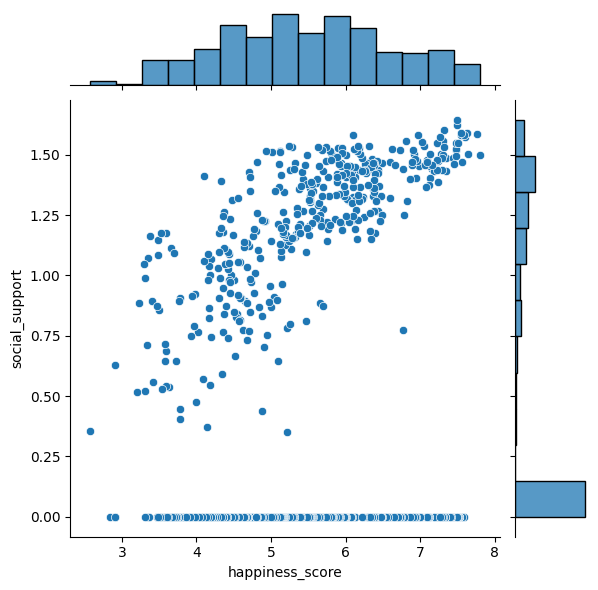

In [ ]:
sns.jointplot(x='happiness_score', y ='social_support', data=happiness)

In [ ]:
# считаем коэф. корреляции Пирсона
happiness[['happiness_score', 'social_support']].corr()

,happiness_score,social_support
happiness_score,1.000000,0.192633
social_support,0.192633,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
happiness[['happiness_score', 'social_support']].corr(method='spearman')

,happiness_score,social_support
happiness_score,1.00000,0.23911
social_support,0.23911,1.00000


In [ ]:
# считаем коэф. корреляции Кенделла
happiness[['happiness_score', 'social_support']].corr(method='kendall')

,happiness_score,social_support
happiness_score,1.000000,0.191904
social_support,0.191904,1.000000


**Выводы:**

При анализе графика, а также коэффициентов корреляции мы видим, что есть слабая положительная связь между уровнем счастья и социальной поддержкой. Визуально мы не можем сказать, что однозначно есть линейная связь, скорее приближенно к ней. Также видим много выбросов на графике. Визуально ситуация не такая четкая, как в первой гипотезе.

In [ ]:
# Оставим только числовые столбцы
numerical_columns = happiness.select_dtypes(include=['float64', 'int64']).columns
# Рассчитаем корреляционную матрицу только для числовых столбцов
correlation_matrix = happiness[numerical_columns].corr()
# Выводим корреляционную матрицу
display(correlation_matrix)

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
happiness_score,1.000000,0.793267,0.154946,0.753534,0.544284,0.155419,0.455477,0.174161,0.023495,0.192633,0.693001
gdp_per_capita,0.793267,1.000000,0.218191,0.774980,0.340260,-0.018355,0.359068,0.042710,-0.035782,0.111701,0.704483
family,0.154946,0.218191,1.000000,-0.054683,0.013833,0.245437,0.114767,0.600243,-0.588630,-0.869885,0.132031
health,0.753534,0.774980,-0.054683,1.000000,0.381869,-0.028882,0.312741,-0.073157,0.070172,0.347438,0.644478
freedom,0.544284,0.340260,0.013833,0.381869,1.000000,0.306240,0.473980,-0.015270,0.058195,0.208709,0.482923
generosity,0.155419,-0.018355,0.245437,-0.028882,0.306240,1.000000,0.280039,0.147750,-0.109797,-0.215131,0.165972
government_trust,0.455477,0.359068,0.114767,0.312741,0.473980,0.280039,1.000000,0.098366,0.021781,-0.008136,0.620089
dystopia_residual,0.174161,0.042710,0.600243,-0.073157,-0.015270,0.147750,0.098366,1.000000,0.057519,-0.654570,0.032630
Year,0.023495,-0.035782,-0.588630,0.070172,0.058195,-0.109797,0.021781,0.057519,1.000000,0.448616,-0.001460
social_support,0.192633,0.111701,-0.869885,0.347438,0.208709,-0.215131,-0.008136,-0.654570,0.448616,1.000000,0.109077


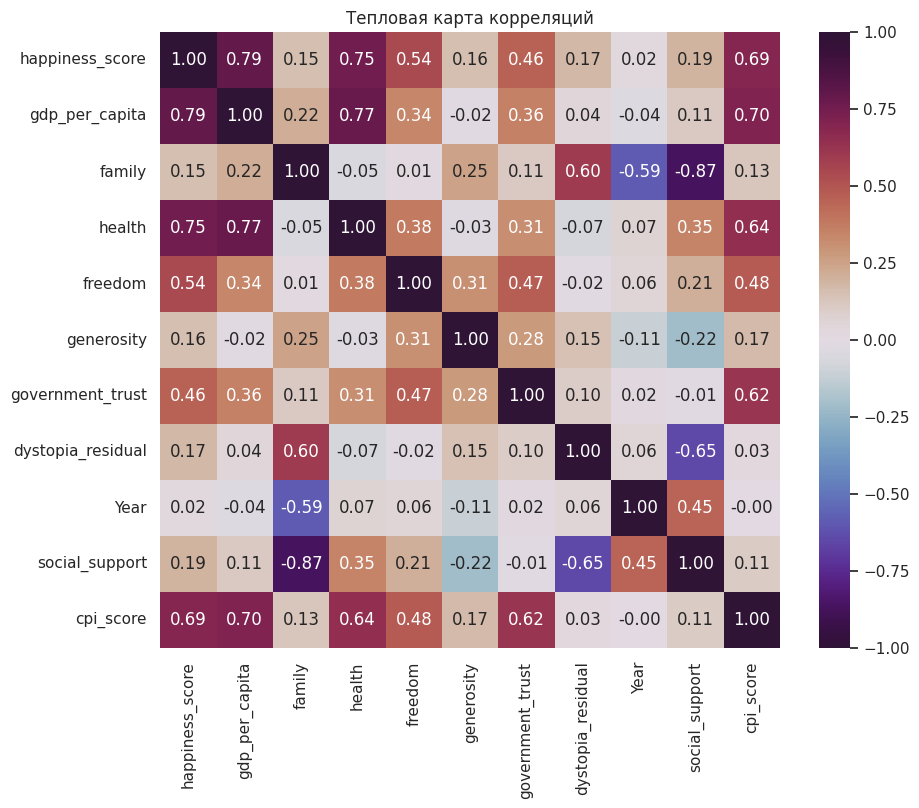

In [ ]:
# Визуализируем тепловую карту корреляционной матрицы всех признаков
numeric_columns = data.select_dtypes(include=['number']).columns
corr_data = data[numeric_columns]
sns.set_theme(style="darkgrid", rc={"figure.figsize": (8, 6)})
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_data.corr(),
    annot=True,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    cmap="twilight_shifted"
)
ax.set_title("Тепловая карта корреляций")
plt.show()

На тепловой карте видно, что наибольшая положительная корреляция уровня счастья у нас наблюдается со следующими параметрами: ИПЦ (индекс потребительский цен), здоровье и ВВП.  

# Задание 2
Продолжаем изучать цены на газ в Южной Корее. Файл с данными “[gas_sales_data.csv](https://drive.google.com/open?id=1OEpViADcNKkkrcj2NoFaKlAYM_FzXqq6&usp=drive_fs)” вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее?

Для этого:

*   Оставьте только два столбца:'Temperature' и 'Sum'.
*   Постройте диаграмму рассеяния.
*   Постройте модель линейной регрессии для выбранных признаков.
*   Рассчитайте точность модели на тестовой выборке.
*   Выведите график остатков.


In [ ]:
gas = pd.read_csv('/content/gas_sales_data.csv')
gas.head() # Просмотрим заголовки

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [ ]:
# Оставим выбранные колонки с температурой и суммой
selected_columns = ['Temperature', 'Sum']
filtered_gas = gas[selected_columns]
print(filtered_gas.head(-5))

     Temperature      Sum
0          -1.20  1717175
1          -0.99  1766341
2           6.64  1490537
3          12.11  1096964
4          17.59   790248
..           ...      ...
242         8.50  2517737
243        11.60  1978688
244        18.30  1429414
245        23.70  1179378
246        23.60  1157225

[247 rows x 2 columns]


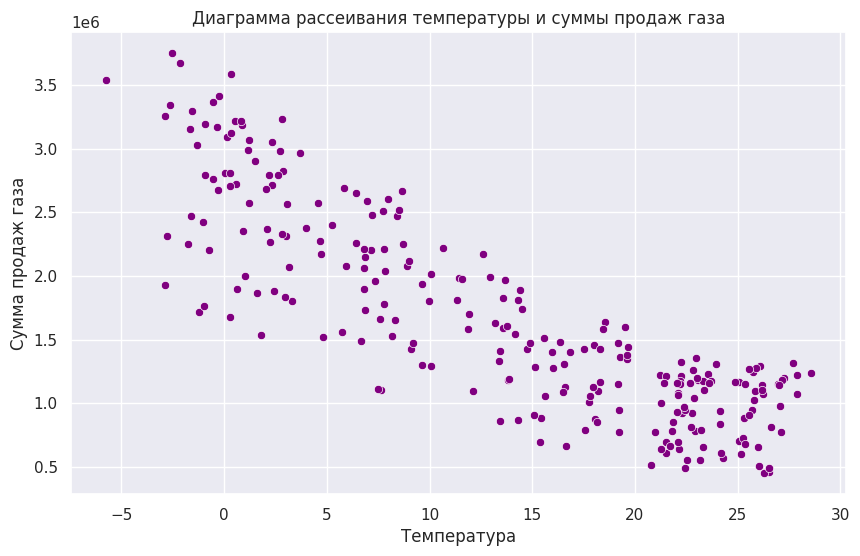

In [ ]:
# Построим диаграмму рассеивания
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_gas, x='Temperature', y='Sum', color='purple')
plt.xlabel('Температура')
plt.ylabel('Сумма продаж газа')
plt.title('Диаграмма рассеивания температуры и суммы продаж газа')
plt.show()

In [ ]:
# Считаем коэф. корреляции Спирмана
filtered_gas[['Temperature', 'Sum']].corr(method='spearman')

,Temperature,Sum
Temperature,1.000000,-0.840029
Sum,-0.840029,1.000000


**Выводы:**

На диаграмме рассеивания мы видим сильную обратную связь между температурой и суммой продаж. На графике можно увидеть, что это линейная связь. Подтверждается расчетом коэффициента корреляции Спирмана. По мере повышения температуры потребность в отоплении снижается, соответственно, уменьшается и потребление газа.

RMSE: 368776.15
R2 Score: 0.74


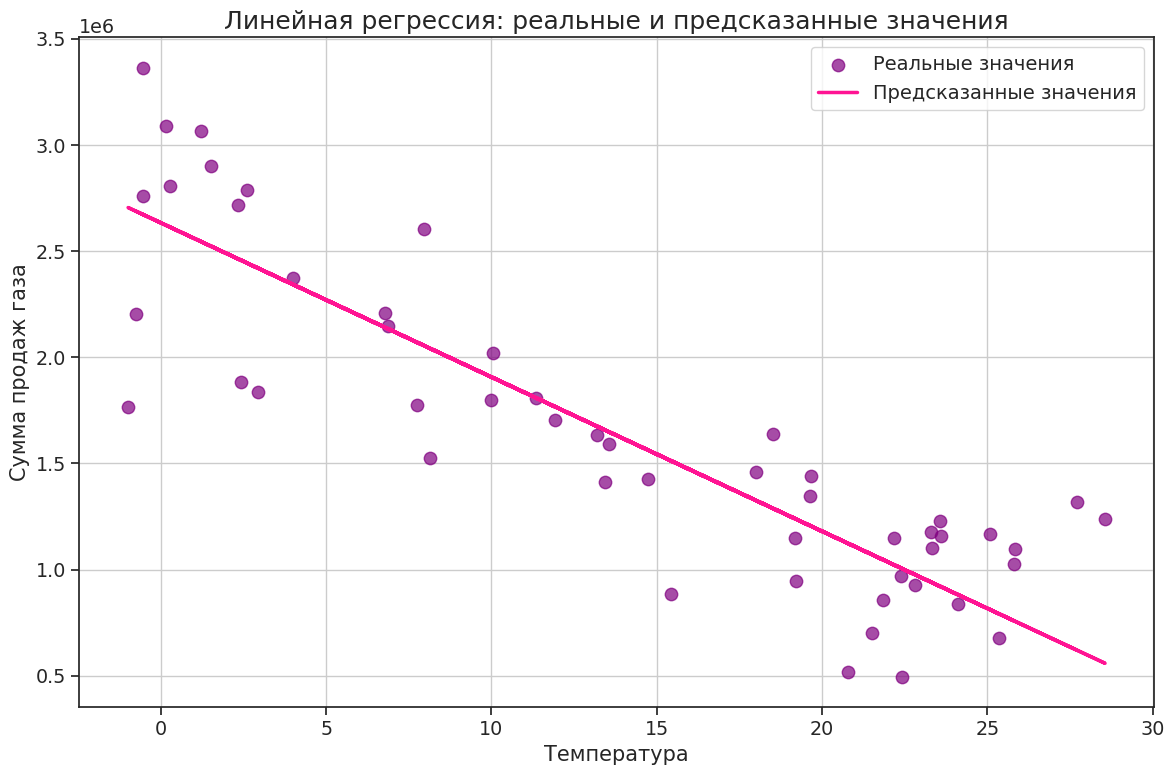

In [ ]:
# Разделим признаки и целевую переменную
X = filtered_gas[['Temperature']]
y = filtered_gas['Sum']
# Делим данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
# Инициализируем модели линейной регрессии
model = LinearRegression()
# Обучаем модели на тренировочных данных
model.fit(X_train, y_train)
# Предсказываем на тестовом наборе
y_pred = model.predict(X_test)
# Оцениваем качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')
sns.set_context("notebook", font_scale=1.25)
sns.set_style("ticks")
# Построим график предсказанных и реальных значений
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, label='Реальные значения', color='purple', s=80, alpha=0.7)
plt.plot(X_test, y_pred, label='Предсказанные значения', color='deeppink', linewidth=2.5)
plt.legend(fontsize=14)
plt.xlabel('Температура', fontsize=15)
plt.ylabel('Сумма продаж газа', fontsize=15)
plt.title('Линейная регрессия: реальные и предсказанные значения', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X = filtered_gas[['Temperature']]
y = filtered_gas['Sum']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_

array([-69215.51486225])

In [ ]:
lm.intercept_

2576468.0184901515

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([1445486.505641  ,  740872.5643433 , 1663515.37745708,
       1250298.75372945,  809395.92405693, 1637213.48180943,
        645355.15383339,  695882.47968284, 1512625.55505738,
        836389.9748532 , 2687904.99741837, 1975677.34948583,
       1973600.88403996, 1838630.63005857, 1045420.8297372 ,
       1215690.99629833, 1217767.4617442 , 1619909.60309387,
       1104946.17251873, 2504483.88303341, 2103726.05198099,
        740180.40919468, 1435796.33356028, 1363120.04295492,
       1648287.96418739, 1988136.14216103,  820470.40643489,
       1629599.77517458, 2046969.32979394,  769250.92543682,
       1045420.8297372 , 2613844.39651577,  960977.90160525,
       1938993.12660883, 1429566.93722268, 2349441.12974197,
       2299605.95904115,  773403.85632856, 2492717.24550683,
       2078116.31148196,  821162.56158351, 2973765.07379946,
       2725973.53059261, 2556395.5191801 , 1584609.69051412,
       1911306.92066394, 1247530.13313496,  828776.26821836,
       1790179.769655  ,

In [ ]:
y_test

,Sum
165,1480101
6,464203
111,1634442
172,1474082
115,907624
...,...
193,2899696
249,1471242
170,2472040
126,1028565


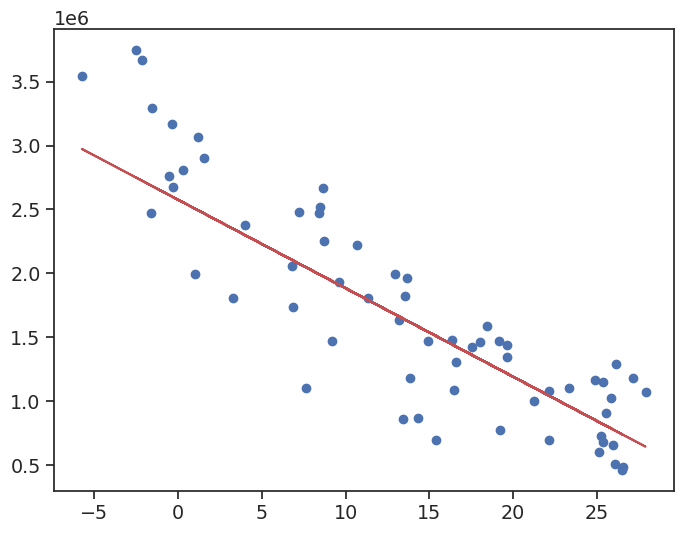

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.7613336584306486
MAE: 337985.3851874801
MSE: 174337922971.16302
RMSE: 417537.92997901764


Коэффициент детерминации близок к 1 (0,7613336584306486), поэтому модель можно считать приемлимой

<Axes: xlabel='Sum', ylabel='Count'>

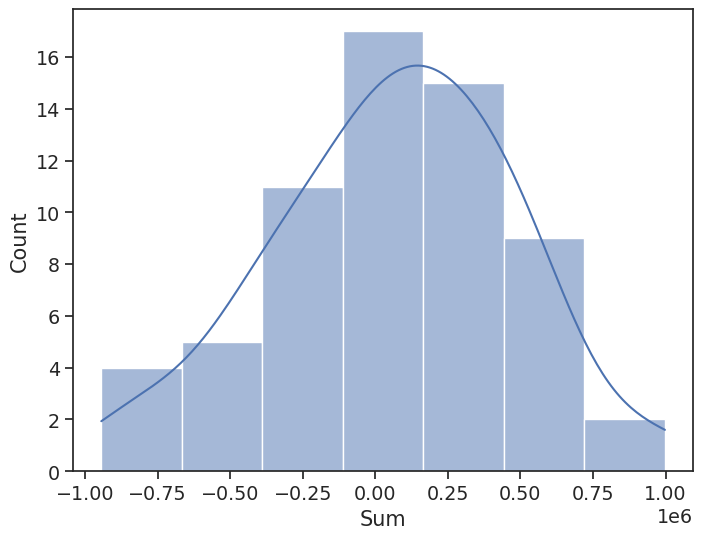

In [ ]:
# Выведем график остатков
sns.histplot((y_test-y_pred), kde=True)